![](./img/logo.png)

# Ejemplo D: Regresión Lineal

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el $Target$ Value 
sea una combinación lineal de las variables de entrada $features$".

In [1]:
## Nombre : German Daniel Rojas
## cc: 1018505981
## Universidad Sergio Arboleda
## Programacion Cientifica 

## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

## 2.- Exporación y preparación del conjunto de datos 

In [30]:
data = pd.read_csv('./data/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
data.shape

(30, 2)

## 3.- A continuación se ajustará el modelo de regresión lineal y predecir 
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 

### X = dataF["YearsExperience"] (o variables independientes)
### Y = dataF["Salary"]


### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Diagrama de dispersión (X;Y).
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

In [6]:
X = data["YearsExperience"]
Y = data["Salary"]

Text(0.5, 1.0, 'Experience  vs Salary')

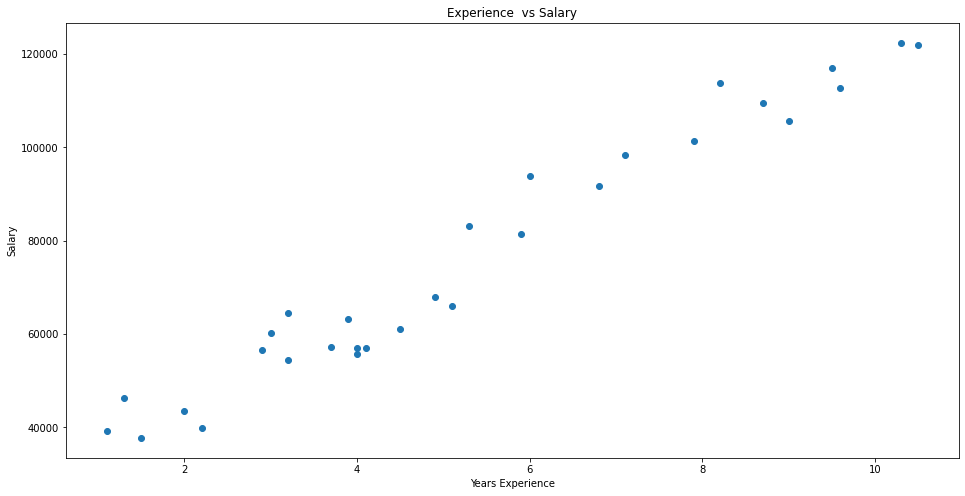

In [8]:
plt.figure(figsize=(16,8))
plt.scatter(X,Y)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title("Experience  vs Salary")

In [52]:
# Selección a modelo lineal
x_train, x_test, y_train, y_test  = train_test_split(X,Y, test_size=0.25, random_state=0)
lm = LinearRegression()

In [53]:
# Entrenar el model0
model_Train = lm.fit(x_train.values.reshape(-1, 1),y_train.values.reshape(-1, 1))

In [54]:
# Impresión de intercepción, coeficientes y numero de coeficientes# Impresión de intercepción, coeficientes y numero de coeficientes
print("Impresion de Intercepción = ",model_Train.intercept_)
print("Impresion de Coeficientes = ",model_Train.coef_)
print("Numero de coeficientes = ", len(model_Train.coef_))

Impresion de Intercepción =  [26986.69131674]
Impresion de Coeficientes =  [[9379.71049195]]
Numero de coeficientes =  1


In [55]:
print("Formula de regresion lineal entrenada: Y = {:.3f} X + {:.3f}".format(model_Train.coef_[0][0],model_Train.intercept_[0]))

Formula de regresion lineal entrenada: Y = 9379.710 X + 26986.691


## 4.-  Predicción 

- Se calcula la predicción $\hat{Y}_i$ (.predict)
- Diagrama de dispersión 

In [63]:
# Make a prediction 
y_predict = model_Train.predict(X.values.reshape(-1,1))

In [57]:
len(x_test)

8

In [65]:
X_2 = X
Y_2 = y_predict

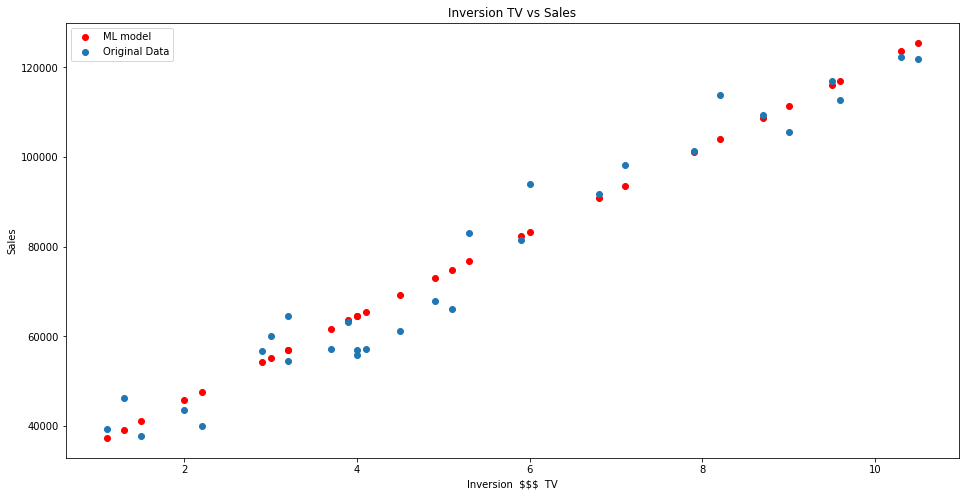

In [68]:
plt.figure(figsize=(16,8),)
plt.scatter(X_2,Y_2,c='r',label="ML model")
plt.scatter(X, Y,label="Original Data")
plt.xlabel('Inversion  $$$  TV')
plt.ylabel('Sales')
plt.legend()
plt.title("Inversion TV vs Sales")
plt.show()

## 5.- Se calcula el <a href=https://acolita.com/que-es-el-error-cuadratico-medio-rmse/>Error Cuadrático Medio y la presición del modelo</a>.

El Root Mean Square Error (RMSE) es la desviación estándar de los residuos (errores de predicción). Los residuos son una medida de cuán lejos de la línea de regresión están los puntos de datos; RMSE es una medida de cuán extendidos están estos residuos. En otras palabras, presenta cuán concentrados están los datos alrededor de la línea de mejor ajuste.

- Entre el Real y la predicción 
- modelo.score()

In [71]:
score = r2_score(Y, y_predict)
mae = mean_absolute_error(Y,y_predict)
mse = mean_squared_error(Y,y_predict)

print('r2_score ',score)
print('MAE', mae)
print('MSE ',mse)

r2_score  0.955975487542377
MAE 4724.65759422699
MSE  31983775.798633035


## 6.- Resumen
- a) Estudiar y preparar los datos
- b) Seleccionar el modelo
- c) Entrenar con los datos de entrenamiento (es decir, el algoritmo de aprendizaje buscó los valores de los parámetros del modelo que minimizan una función de costo).
- d) Aplicar el modelo para hacer predicciones sobre nuevos casos ($inferencia$)